### Install Python 3.10.8 because Colab is a boomer

In [1]:
!python --version

Python 3.10.8


### Install and import a bunch of libraries and modules

<html>
<ol>
<li>PyTorch and submodules (Python machine learning library)</li>
<li>PyTorch Geometric (machine learning library for graph-based learning)</li>
<li>Matplotlib (drawing and plotting library)</li>
<li>NetworkX (Python data science/network/graph library)</li>
</ol>

In [2]:
import torch
import torch.nn as nn
from torch_geometric import *

In [3]:
from torch_geometric.datasets import QM9, ZINC, MoleculeNet

In [4]:
from torch_geometric.data import *

In [5]:
from torch_geometric.utils.convert import to_networkx

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
from torch_geometric.transforms import NormalizeFeatures

In [8]:
import scipy
import scipy.io

### The QM9 Dataset
Loads the QM9 Dataset -- a datset with 134K organic molecules -- from the PyTorch Geometric `datasets` submodule.  
This dataset contains all the molecules represented in a graphical format, where atoms are vertices and edges are bonds between atoms.

Problem: cannot download the QM9 dataset it seems, everything else is working perfectly

In [9]:
dataset = QM9('', transform=None, pre_transform=None, pre_filter=None)

⬇️ Function that gets information about a molecule from the dataset

In [10]:
def get_info(idx: int):
    data = dataset[idx]
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    return data

⬇️ Function that prints the data associated with the molecule

In [11]:
def mol_info(data):
    for prop in data: print(prop)

⬇️ Function that draws the graphical representation of the molecule

In [12]:
def draw_mol(data):
    vis = to_networkx(data)
    plt.figure(1, figsize=(8,8))
    nx.draw(vis)
    plt.show()

Create a **Dataset Loader** class for O.O.P purposes

In [13]:
class DatasetLoader:
    def __init__(self):
        self.dataset = dataset
        self.name = "Dataset Loader"

    def get_info(self, idx: int):
        data = self.dataset[idx]
        print(f'Number of nodes: {data.num_nodes}')
        print(f'Number of edges: {data.num_edges}')
        print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
        print(f'Has isolated nodes: {data.has_isolated_nodes()}')
        print(f'Has self-loops: {data.has_self_loops()}')
        print(f'Is undirected: {data.is_undirected()}')
        
    def mol_info(self, data):
        for prop in data: print(prop)

    def draw_mol(self, data):
        vis = to_networkx(data)
        plt.figure(1, figsize=(8,8))
        nx.draw(vis)
        plt.show()

    def __len__(self) -> int:
        return len(self.dataset) #13081

    def __getitem__(self, idx, verbose=False, draw=False):
        if verbose:
            self.get_info(idx)
            print()
        data = self.dataset[idx]
        self.mol_info(data)
        if draw:
            print()
            self.draw_mol(data)
        return data

In [14]:
DL = DatasetLoader()

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

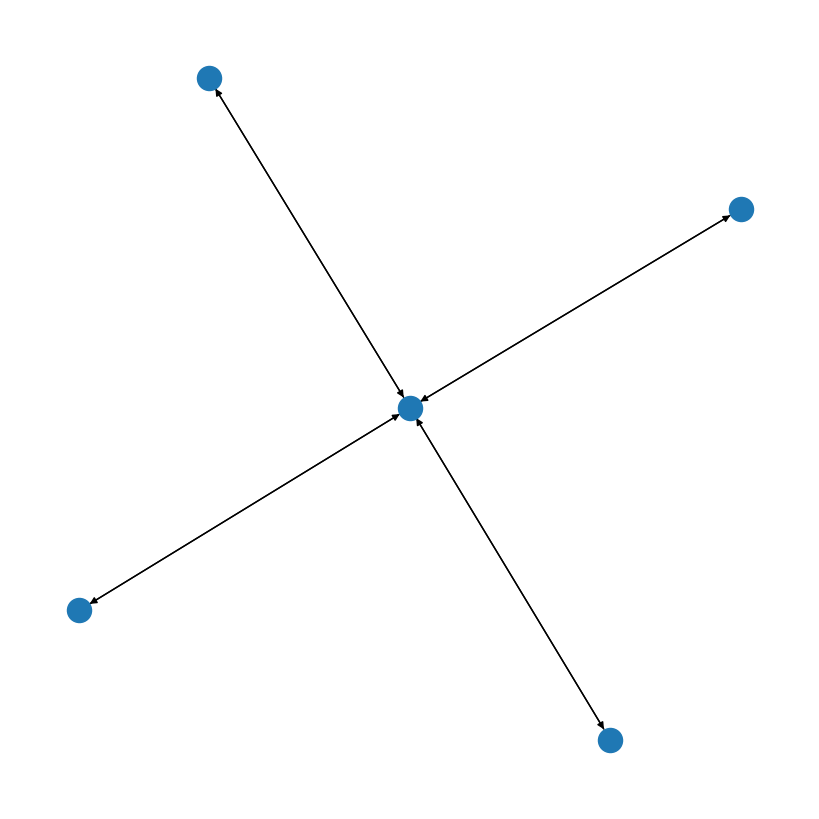

Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], name='gdb_1', idx=[1])

In [15]:
DL.__getitem__(0, verbose=False, draw=True)

### Get the NetGAN model

Clone the repository; using original NetGAN

Better way to access models:

In [16]:
import sys
#sys.path.insert(1, '../../netgan_pytorch/netgan')
sys.path.insert(1, 'netgan_pytorch/netgan')

In [17]:
from models import *

In [18]:
from utils import *

In [19]:
from training import *

In [105]:
import pennylane as qml

### Convert PyG data to Scipy Sparse Matrix

In [20]:
def pyg_to_ssm(idx: int, v: bool=False, d: bool=False):
    sample = DL.__getitem__(idx, verbose=v, draw=d)
    sample = to_networkx(sample)
    sample_mat = nx.to_scipy_sparse_matrix(sample)
    return sample, sample_mat

In [21]:
ch4, methane = pyg_to_ssm(0)

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_8248/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [22]:
torch_geometric.utils.convert.from_networkx(ch4)

Data(edge_index=[2, 8], num_nodes=5)

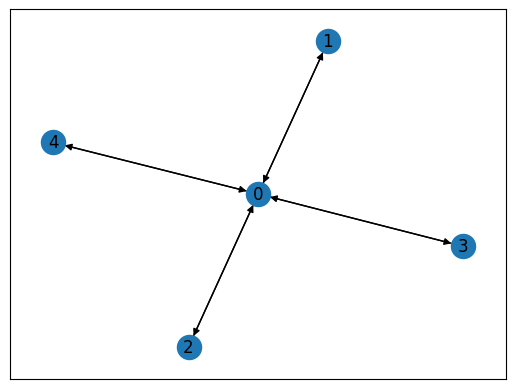

In [23]:
nx.draw_networkx(ch4, pos=None, arrows=None, with_labels=True)

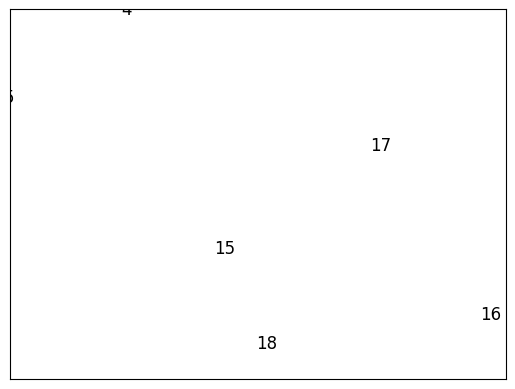

In [24]:
G = nx.dodecahedral_graph()
labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

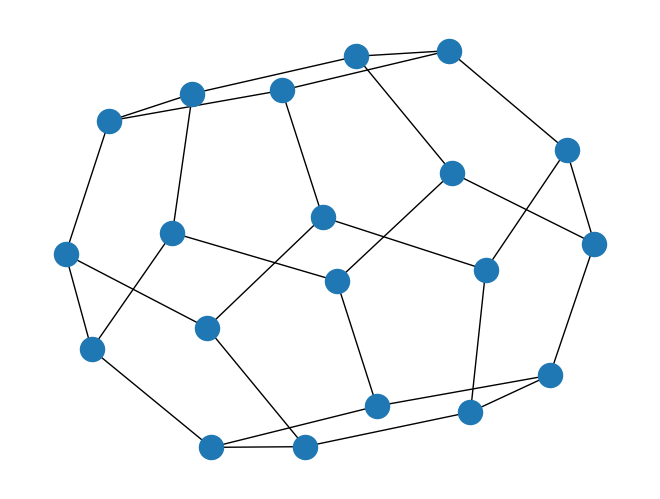

In [25]:
nx.draw(G)

In [26]:
nx.spring_layout(G)

{0: array([-0.1921022 , -0.52137114]),
 1: array([-0.15979761,  0.12726024]),
 2: array([-0.63127442,  0.52413846]),
 3: array([-1.        ,  0.01193379]),
 4: array([-0.73161355,  0.20639275]),
 5: array([-0.34746083,  0.68862676]),
 6: array([-0.21406828,  0.99808363]),
 7: array([0.39513944, 0.88614153]),
 8: array([0.4579338 , 0.29278867]),
 9: array([ 0.77525723, -0.23917711]),
 10: array([ 0.39311421, -0.72777287]),
 11: array([ 0.18721829, -0.98366583]),
 12: array([ 0.59699419, -0.49484232]),
 13: array([0.98813461, 0.01839826]),
 14: array([0.77128676, 0.59340218]),
 15: array([0.21150813, 0.51055151]),
 16: array([ 0.15055569, -0.12373975]),
 17: array([-0.45084168, -0.31196759]),
 18: array([-0.42055115, -0.88513005]),
 19: array([-0.77943264, -0.57005112])}

In [27]:
not_ch4, not_methane = pyg_to_ssm(18456)

('x', tensor([[0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[ 0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,
          6,  6,  6,  7,  7,  7,  7,  8,  9, 10, 11, 12],
        [ 1,  0,  2,  6,  1,  3,  7,  8,  2,  4,  3,  5,  7,  9,  4,  6, 10, 11,
          1,  5,  7,  2,  4,  6, 12,  2,  4,  5,  5,  7

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_8248/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [28]:
print(not_ch4)

DiGraph with 13 nodes and 30 edges


In [29]:
print(not_methane)

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 6)	1
  (2, 1)	1
  (2, 3)	1
  (2, 7)	1
  (2, 8)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (4, 7)	1
  (4, 9)	1
  (5, 4)	1
  (5, 6)	1
  (5, 10)	1
  (5, 11)	1
  (6, 1)	1
  (6, 5)	1
  (6, 7)	1
  (7, 2)	1
  (7, 4)	1
  (7, 6)	1
  (7, 12)	1
  (8, 2)	1
  (9, 4)	1
  (10, 5)	1
  (11, 5)	1
  (12, 7)	1


### Now, let's try running NetGAN on a very small sample of the QM9 Dataset

In [30]:
import io

In [31]:
graph = nx.to_numpy_array(not_ch4)

In [32]:
graph

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [33]:
temp = nx.from_numpy_array(graph)

In [34]:
temp

In [35]:
graph[graph!=0] = 1.0
graph_nx = nx.from_numpy_array(graph)
graph_sparse = scipy.sparse.csr_matrix(graph)
n_edges = graph.sum()

In [36]:
print(f"This graph has {n_edges} edges!")

This graph has 30.0 edges!


In [37]:
graph_sparse

<13x13 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [38]:
not_graph_sparse = scipy.sparse.tril(graph_sparse).tocsr()

In [39]:
mst = scipy.sparse.csgraph.minimum_spanning_tree(not_graph_sparse)

In [40]:
mst[mst > 1] = 1
mst.eliminate_zeros()
ihatethis = not_graph_sparse - mst

In [41]:
print(ihatethis)

  (6, 5)	1.0
  (7, 4)	1.0
  (7, 6)	1.0


In [42]:
trainer = Trainer(graph_sparse, len(graph), set_ops=False)

  (0, 1)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 6)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 7)	1.0
  (2, 8)	1.0
  (3, 2)	1.0
  (3, 4)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (4, 7)	1.0
  (4, 9)	1.0
  (5, 4)	1.0
  (5, 6)	1.0
  (5, 10)	1.0
  (5, 11)	1.0
  (6, 1)	1.0
  (6, 5)	1.0
  (6, 7)	1.0
  (7, 2)	1.0
  (7, 4)	1.0
  (7, 6)	1.0
  (7, 12)	1.0
  (8, 2)	1.0
  (9, 4)	1.0
  (10, 5)	1.0
  (11, 5)	1.0
  (12, 7)	1.0
This graph is connected
idx_ones looks like [0 1 2]
s_train is equal to 0
test_ones looks like [[6 5]
 [7 4]
 [7 6]]
N_test is 3.
test_zeros looks like [[ 7  0]
 [10  6]
 [ 9  1]] with length 3.


**** Using VAL criterion for early stopping with max patience of: 5****
iteration: 1      critic: 4.673084      gen 0.026880
iteration: 11      critic: 0.206089      gen 0.033698
iteration: 21      critic: -0.023848      gen -0.092859
iteration: 31      critic: -0.233862      gen -0.279675
iteration: 41      critic: -0.495880      gen -0.415825
iteration: 51      critic: -0.566009      gen -0.413627
iteration: 61      critic: -0.563480      gen -0.405752
iteration: 71      critic: -0.644639      gen -0.342334
iteration: 81      critic: -0.777009      gen -0.452380
iteration: 91      critic: -0.906606      gen -0.412274
1
samples:[[ 9  9  6  1  3  4  1  4  6  6  2  3  5  2  6  6]
 [ 4  5 12 11  0  8  6  5  2  9  8  7  0  5  6  3]]
roc: 0.6250   avp: 0.7500   eo: 0.2667
Took 1.2424484133720397 minutes so far..


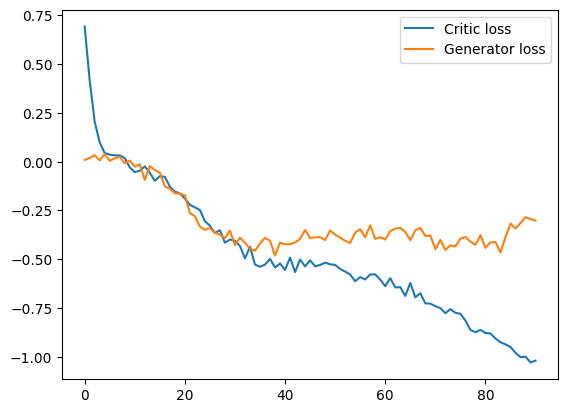

iteration: 101      critic: -1.018287      gen -0.305060
iteration: 111      critic: -1.077739      gen -0.183627
iteration: 121      critic: -1.173609      gen -0.030092
iteration: 131      critic: -1.163902      gen -0.045634
iteration: 141      critic: -1.224184      gen -0.027896
iteration: 151      critic: -1.240036      gen 0.053745
iteration: 161      critic: -1.332160      gen 0.097123
iteration: 171      critic: -1.344630      gen 0.116427
iteration: 181      critic: -1.397903      gen 0.051206
iteration: 191      critic: -1.413392      gen 0.104177
1
samples:[[ 0 12  8  1 12 10  6  2 10  0  5  7  0  1  1 10]
 [ 4  5  3  4  4  1  3  2  1  2  4  3  1  2  7  9]]
roc: 0.0000   avp: 0.5000   eo: 0.3333
Took 2.377652581532796 minutes so far..


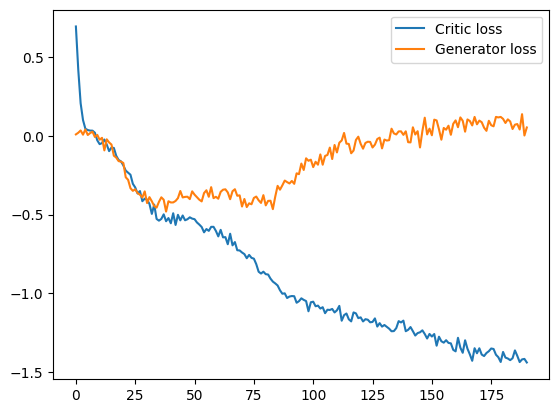

iteration: 201      critic: -1.382398      gen 0.139627
iteration: 211      critic: -1.474415      gen 0.074094
iteration: 221      critic: -1.462830      gen 0.071364
iteration: 231      critic: -1.455136      gen 0.094847
iteration: 241      critic: -1.423466      gen 0.077741
iteration: 251      critic: -1.435108      gen -0.069237
iteration: 261      critic: -1.491288      gen -0.006670
iteration: 271      critic: -1.454492      gen -0.051058
iteration: 281      critic: -1.495805      gen -0.012135
iteration: 291      critic: -1.435403      gen -0.104388
1
samples:[[ 4 12  9  5  8  7  2  5  4  2  8  4  7  3 10  2]
 [ 8  6  1  1  0  1  0  2  1  6  2  0  1  2  5  2]]
roc: 0.7500   avp: 0.7500   eo: 0.3333
Took 3.5469340523084005 minutes so far..


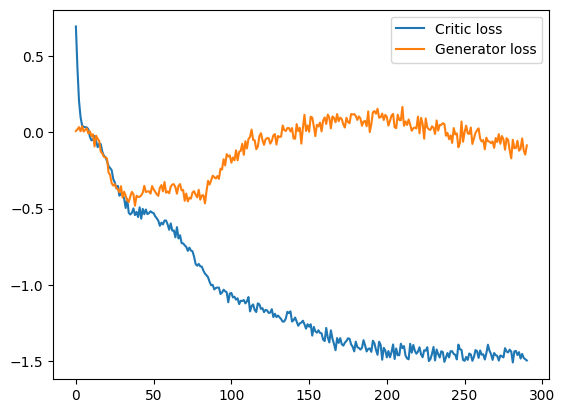

iteration: 301      critic: -1.404166      gen -0.198376
iteration: 311      critic: -1.438779      gen -0.092663
iteration: 321      critic: -1.470296      gen -0.173838
iteration: 331      critic: -1.425557      gen -0.253569
iteration: 341      critic: -1.412024      gen -0.215640
iteration: 351      critic: -1.399481      gen -0.258891
iteration: 361      critic: -1.358082      gen -0.274684
iteration: 371      critic: -1.373753      gen -0.385131
iteration: 381      critic: -1.366130      gen -0.352674
iteration: 391      critic: -1.334691      gen -0.358409
1
samples:[[ 1  0  6 11  2  1 12  1  2  0  5  1 12  7  7  2]
 [ 4  2  5  6  4  3  2  1  1  2  3  7  1  2  2  7]]
roc: 0.7500   avp: 0.7500   eo: 0.3333
Took 4.763294132550557 minutes so far..


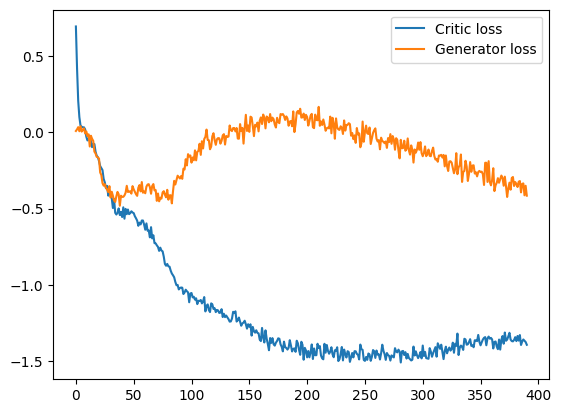

iteration: 401      critic: -1.363806      gen -0.372230
iteration: 411      critic: -1.337876      gen -0.316936
iteration: 421      critic: -1.351072      gen -0.349394
iteration: 431      critic: -1.403293      gen -0.288590
iteration: 441      critic: -1.370825      gen -0.360576
iteration: 451      critic: -1.295597      gen -0.303770
iteration: 461      critic: -1.292179      gen -0.355078
iteration: 471      critic: -1.311727      gen -0.353807
iteration: 481      critic: -1.379381      gen -0.441962
iteration: 491      critic: -1.328299      gen -0.327344
1
samples:[[ 3 10  8  2  8  2  7  1  6  1  0  6 12 12  2  3]
 [ 1  1  2  2  1  8  2  3  3  7  1  2  1  2  7  1]]


ValueError: Fewer non-zero entries in p than size

In [43]:
trainer.train(create_graph_every=100, plot_graph_every=100, num_samples_graph=1000, stopping_criterion='val')

1
11
21
31
41


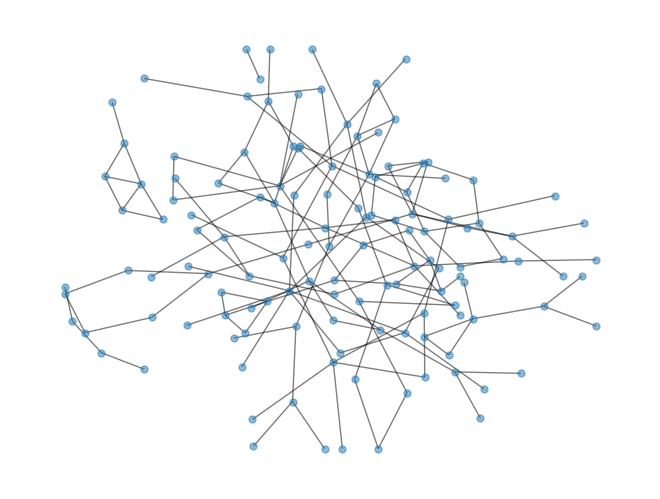

In [44]:
trans_mat = trainer.create_transition_matrix(50000)
graph_synthetic = []
for i in range(10):
    graph_sampled = graph_from_scores(trans_mat, n_edges)
    graph_synthetic.append(graph_sampled)
    graph_nx_sampled = nx.from_numpy_array(graph_sampled)
    nx.draw(graph_nx_sampled, node_size=25, alpha=0.5)

In [45]:
import rdkit.Chem as Chem

In [81]:
from rdkit.Chem import AllChem, rdMolDescriptors

In [47]:
from rdkit.Chem.Descriptors import ExactMolWt

In [48]:
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors

In [49]:
from rdkit.Chem.Crippen import MolLogP

In [50]:
class MethFactory(object):
    def __init__(self, mol, folder, draw=True, Fluorine=False):
        self.mol = nx.from_numpy_array(mol)
        #if draw: nx.draw(self.mol)
        self.atom_labels = {}
        self.valence = {
            1 : "H", #Hydrogen
            2 : "O", #Oxygen
            3 : "N", #Nitrogen
            4 : "C" #Carbon
        }
        if Fluorine: self.valence[1] = "F"
        for vertex, degree in self.mol.degree():
            self.atom_labels[vertex] = self.valence[degree]
        if draw:
            reds = [x for x in self.atom_labels.keys() if self.atom_labels[x] == "O"]
            blacks = [x for x in self.atom_labels.keys() if self.atom_labels[x] == "C"]
            blues = [x for x in self.atom_labels.keys() if self.atom_labels[x] == "N"]
            greys = [x for x in self.atom_labels.keys() if self.atom_labels[x] == "H"]
            greens = [x for x in self.atom_labels.keys() if self.atom_labels[x] == "F"]
            pos = nx.spring_layout(self.mol, seed=69420)
            nx.draw_networkx(self.mol, pos, nodelist=reds, node_color="#ff0000")
            nx.draw_networkx(self.mol, pos, nodelist=blues, node_color="tab:blue")
            nx.draw_networkx(self.mol, pos, nodelist=blacks, node_color="#111111")
            nx.draw_networkx(self.mol, pos, nodelist=greys, node_color="#dddddd")
            nx.draw_networkx(self.mol, pos, nodelist=greens, node_color="tab:green")
        self.node_list = list(self.atom_labels.values())
        self.adj = nx.adjacency_matrix(temp).toarray()
        self.illicit_drug = self.MolFromGraphs(self.node_list, self.adj)
        self.illicit_drug
        #print("Valid Molecule" if self.valid_molecule() else "Invalid Molecule")
            
    def MolFromGraphs(self, node_list, adjacency_matrix):
        # create empty editable mol object
        mol = Chem.RWMol()
        # add atoms to mol and keep track of index
        node_to_idx = {}
        for i in range(len(node_list)):
            a = Chem.Atom(node_list[i])
            molIdx = mol.AddAtom(a)
            node_to_idx[i] = molIdx

        # add bonds between adjacent atoms
        for ix, row in enumerate(adjacency_matrix):
            for iy, bond in enumerate(row):
                # only traverse half the matrix
                if iy <= ix:
                    continue
                # add relevant bond type (there are many more of these)
                if bond == 0:
                    continue
                elif bond == 1:
                    bond_type = Chem.rdchem.BondType.SINGLE
                    mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
                elif bond == 2:
                    bond_type = Chem.rdchem.BondType.DOUBLE
                    mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)

        # Convert RWMol to Mol object
        mol = mol.GetMol()
        return mol
    
    def valid_molecule(self):
        """No more than 5 hydrogen bond donors
        No more than 10 hydrogen bond acceptors
        Molecular mass less than 500 Da
        Partition coefficient not greater than 5"""
        return all([
            NumHAcceptors(self.illicit_drug) <= 10,
            NumHDonors(self.illicit_drug) <= 5,
            ExactMolWt(self.illicit_drug) <= 500,
            MolLogP(self.illicit_drug) <= 5
        ])

    def getSmiles(self):
        Chem.Kekulize(self.illicit_drug)
        #AllChem.MMFFOptimizeMolecule(self.illicit_drug)
        return Chem.MolToSmiles(self.illicit_drug, kekuleSmiles=True)
       

In [51]:
MFs = []
for i in range(10):
    try: ww = MethFactory(graph_synthetic[i], 'netgan_pytorch', draw=False, Fluorine=False)
    except KeyError: continue
    MFs.append(ww)

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_8248/4082174901.py:28: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.adj = nx.adjacency_matrix(temp).toarray()


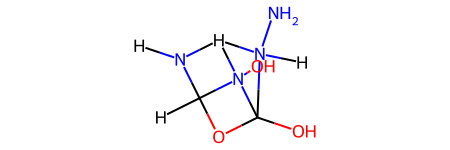

In [56]:
MFs[1].illicit_drug

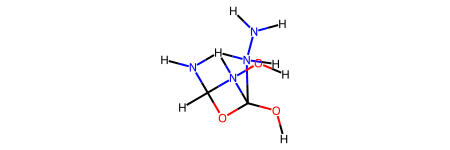

In [57]:
Chem.AddHs(MFs[1].illicit_drug)

In [59]:
MFs[1].valid_molecule()

True

In [94]:
MFs[1].getSmiles()

'[H]N1[H]2N([H])(N)C3(O)OC1([H])N23O'

In [62]:
Chem.Draw.MolToFile(MFs[1].illicit_drug, f'netgan_pytorch/illicit_drug3345.png')  

In [75]:
rage = MFs[1].illicit_drug

In [92]:
with open("illicit_drug.xyz", 'w') as fout:
    for i, atom in enumerate(rage.GetAtoms()):
        positions = rage.GetConformer().GetAtomPosition(i)
        fout.write(f"{atom.GetSymbol()}\t{positions.x}\t{positions.y}\t{positions.z}")
    fout.close()